In [1]:
from multiprocessing import Pool
import numpy as np
import matplotlib.pylab as plt
from XY_diagonalisation import Computations_XY_model as XY_model
from tqdm.notebook import tqdm
from IPython.display import clear_output
import time
from XY_diagonalisation import Plot_XY_Computations as XY_model_plotting

In [2]:
from functools import partial

In [13]:
XY_model.N_size=50001
XY_model.Gamma = 1/2
XY_model.Lambda = 4/7
with Pool(3) as p:
    Fourier_ground=partial(XY_model.Simple_Fourier_Transform ,Ground=True) # prod_x has only one argument x (y is fixed to 10)
    Data =np.array(p.map(Fourier_ground,range(10)))

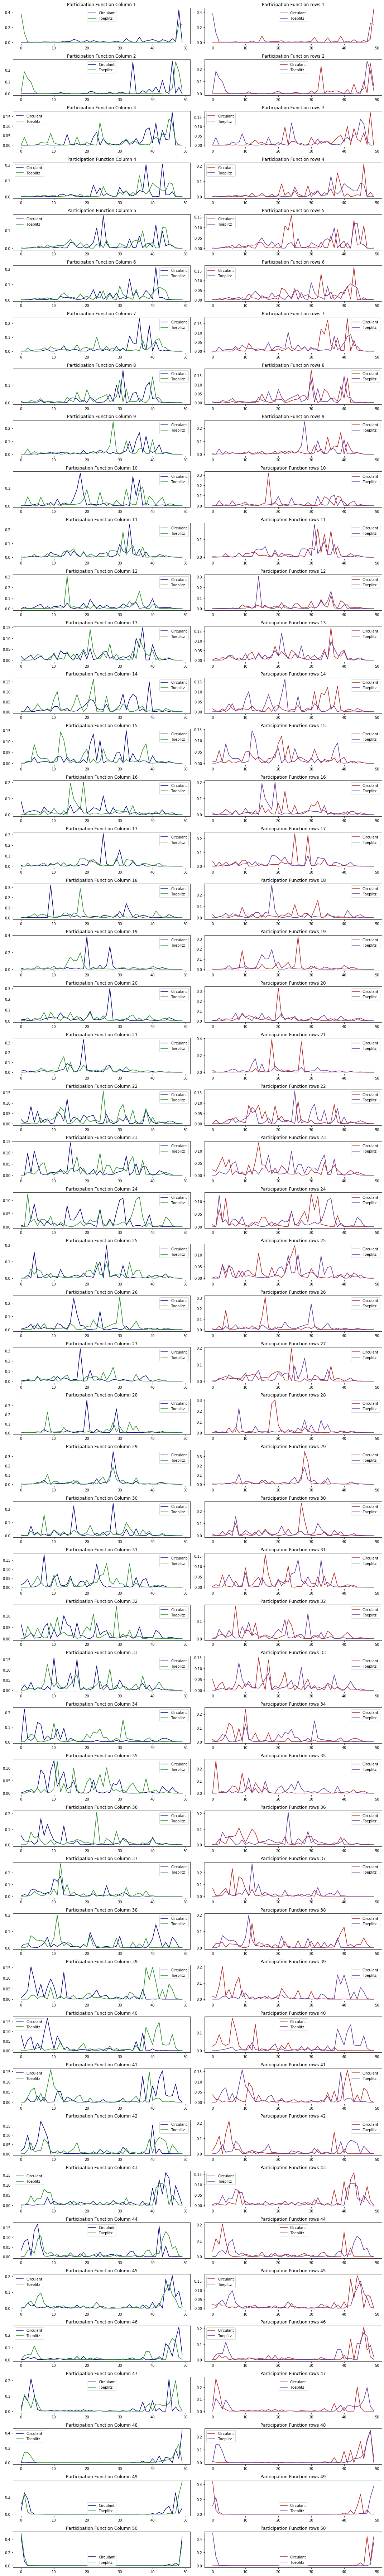

In [14]:
fig, axes = XY_model_plotting.Plot_Participation_Function(Data[:,:,0].mean(axis=0),Data[:,:,1].mean(axis=0),50,Both=True)
plt.show()

In [15]:
P=XY_model.Compute_Participation_Function(Data[:,:,0].mean(axis=0),Data[:,:,1].mean(axis=0),50,Circulant = False)

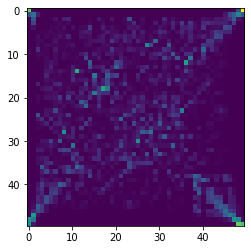

In [16]:
plt.imshow(P)

In [17]:
x=np.arange(0,50)
y=np.arange(0,50)
X,Y = np.meshgrid(x,y)

In [18]:
from mpl_toolkits import mplot3d

In [19]:
from IPython.display import clear_output

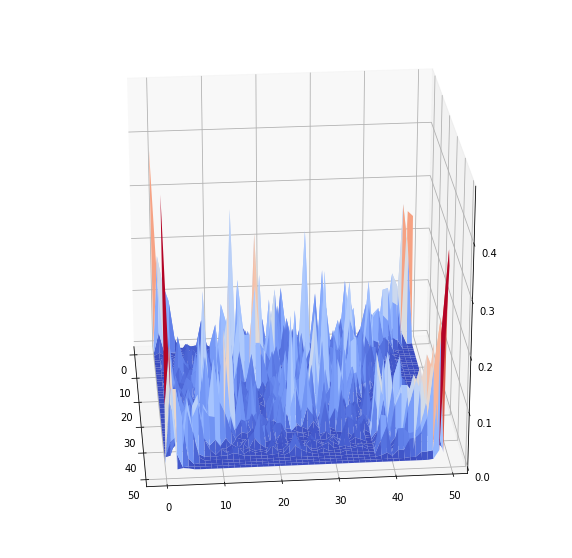

In [20]:
for i in range(0,360,5):
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection='3d')
    ax.plot_surface(X, Y, P,cmap='coolwarm', edgecolor='none')
    ax.view_init(elev=25., azim=i)
    #plt.savefig("Participation_{}.png".format(str(i).zfill(3)))
    #plt.close()
    plt.show()
    clear_output(wait=True)

In [6]:
A,S,B = XY_model.Compute_svd_Cov_Matrix(Data[:,:,0].mean(axis=0),Data[:,:,1].mean(axis=0),50)

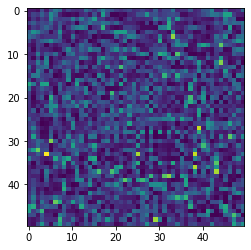

In [10]:
plt.imshow(A**2 + B**2)

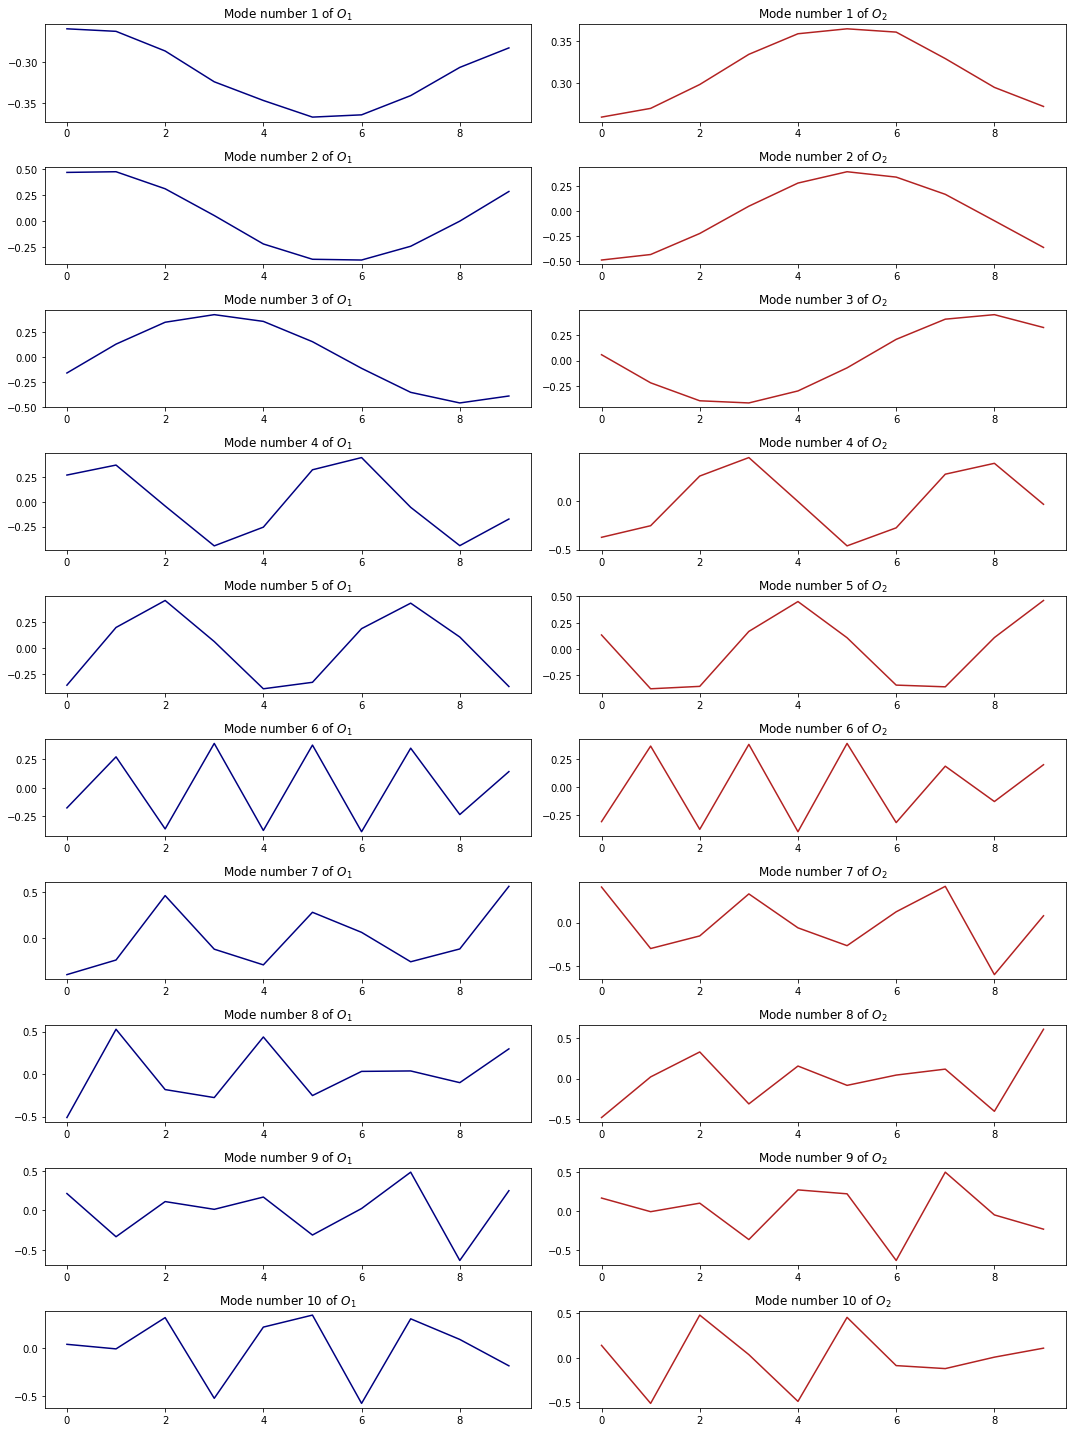

In [7]:
fig,axes = XY_model_plotting.Plot_Modes(Data[0,:,0],Data[0,:,1],10)
plt.show()

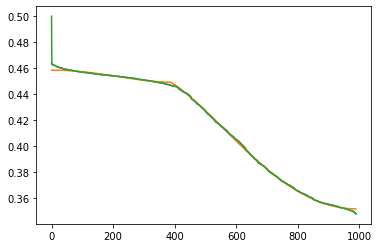

In [10]:
for L in range(30,1000,10):
    S=XY_model.Compute_Spectrum_Random_State_Circulant(Data[:,:,0].mean(axis=0),Data[:,:,1].mean(axis=0),L)
    S_toe,fermi = XY_model.Compute_Spectrum_Random_Distribution_Associated(Data[:,:,0].mean(axis=0),Data[:,:,1].mean(axis=0),L)
    plt.plot(sorted(-S+0.5,reverse=True))
    plt.plot(fermi)
    plt.plot(S_toe)
    plt.show()
    clear_output(wait=True)

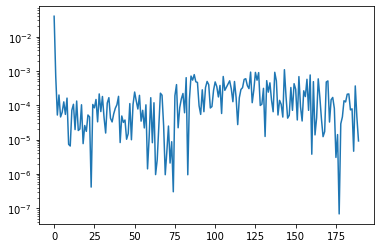

In [15]:
results={}
for L in range(30,200,10):
    S=XY_model.Compute_Spectrum_Random_State_Circulant(Data[:,:,0].mean(axis=0),Data[:,:,1].mean(axis=0),L)
    S_toe,fermi = XY_model.Compute_Spectrum_Random_Distribution_Associated(Data[:,:,0].mean(axis=0),Data[:,:,1].mean(axis=0),L)
    results[L]=np.abs(np.array(sorted(-S+0.5,reverse=True))-S_toe)
    plt.plot(np.abs(np.array(sorted(-S+0.5,reverse=True))-S_toe))
    plt.yscale("log")
    plt.show()
    clear_output(wait=True)

In [22]:
fluctuations_rms = []
for L in range(30,1000,10):
    print(L,end="\r")
    S=XY_model.Compute_Spectrum_Random_State_Circulant(Data[:,:,0].mean(axis=0),Data[:,:,1].mean(axis=0),L)
    S_toe,fermi = XY_model.Compute_Spectrum_Random_Distribution_Associated(Data[:,:,0].mean(axis=0),Data[:,:,1].mean(axis=0),L)    
    fluctuations_rms.append(np.sum(np.square(S-np.array(fermi))))

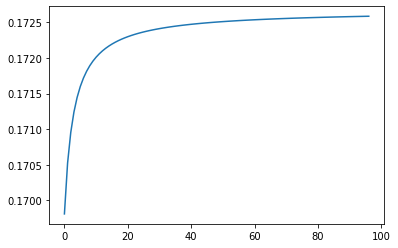

In [23]:
plt.plot(fluctuations_rms/np.array(range(30,1000,10)))

In [24]:
fluctuations_abs = []
for L in range(30,1000,10):
    print(L,end="\r")
    S=XY_model.Compute_Spectrum_Random_State_Circulant(Data[:,:,0].mean(axis=0),Data[:,:,1].mean(axis=0),L)
    S_toe,fermi = XY_model.Compute_Spectrum_Random_Distribution_Associated(Data[:,:,0].mean(axis=0),Data[:,:,1].mean(axis=0),L)    
    fluctuations_abs.append(np.abs(S-np.array(fermi)).sum())

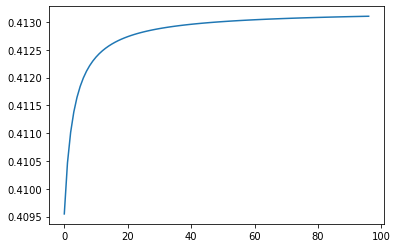

In [25]:
plt.plot(fluctuations_abs/np.array(range(30,1000,10)))

In [26]:
fluctuations_rms = []
for L in range(30,1000,10):
    print(L,end="\r")
    S_toe,fermi = XY_model.Compute_Spectrum_Random_Distribution_Associated(Data[:,:,0].mean(axis=0),Data[:,:,1].mean(axis=0),L)    
    fluctuations_rms.append(np.square(np.array(S_toe)-np.array(fermi)).sum())
fluctuations_abs = []
for L in range(30,1000,10):
    print(L,end="\r")
    S_toe,fermi = XY_model.Compute_Spectrum_Random_Distribution_Associated(Data[:,:,0].mean(axis=0),Data[:,:,1].mean(axis=0),L)    
    fluctuations_abs.append(np.abs(np.array(S_toe)-np.array(fermi)).sum())

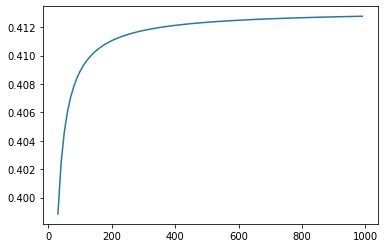

In [30]:
plt.plot(range(30,1000,10),fluctuations_abs/np.array(range(30,1000,10)))

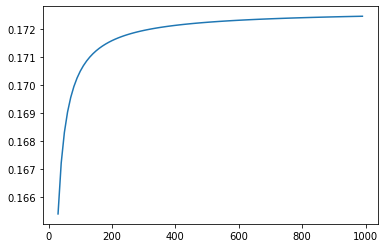

In [29]:
plt.plot(range(30,1000,10),fluctuations_rms/np.array(range(30,1000,10)))

(<Figure size 1080x1440 with 10 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1195dbdd0>,
       dtype=object))

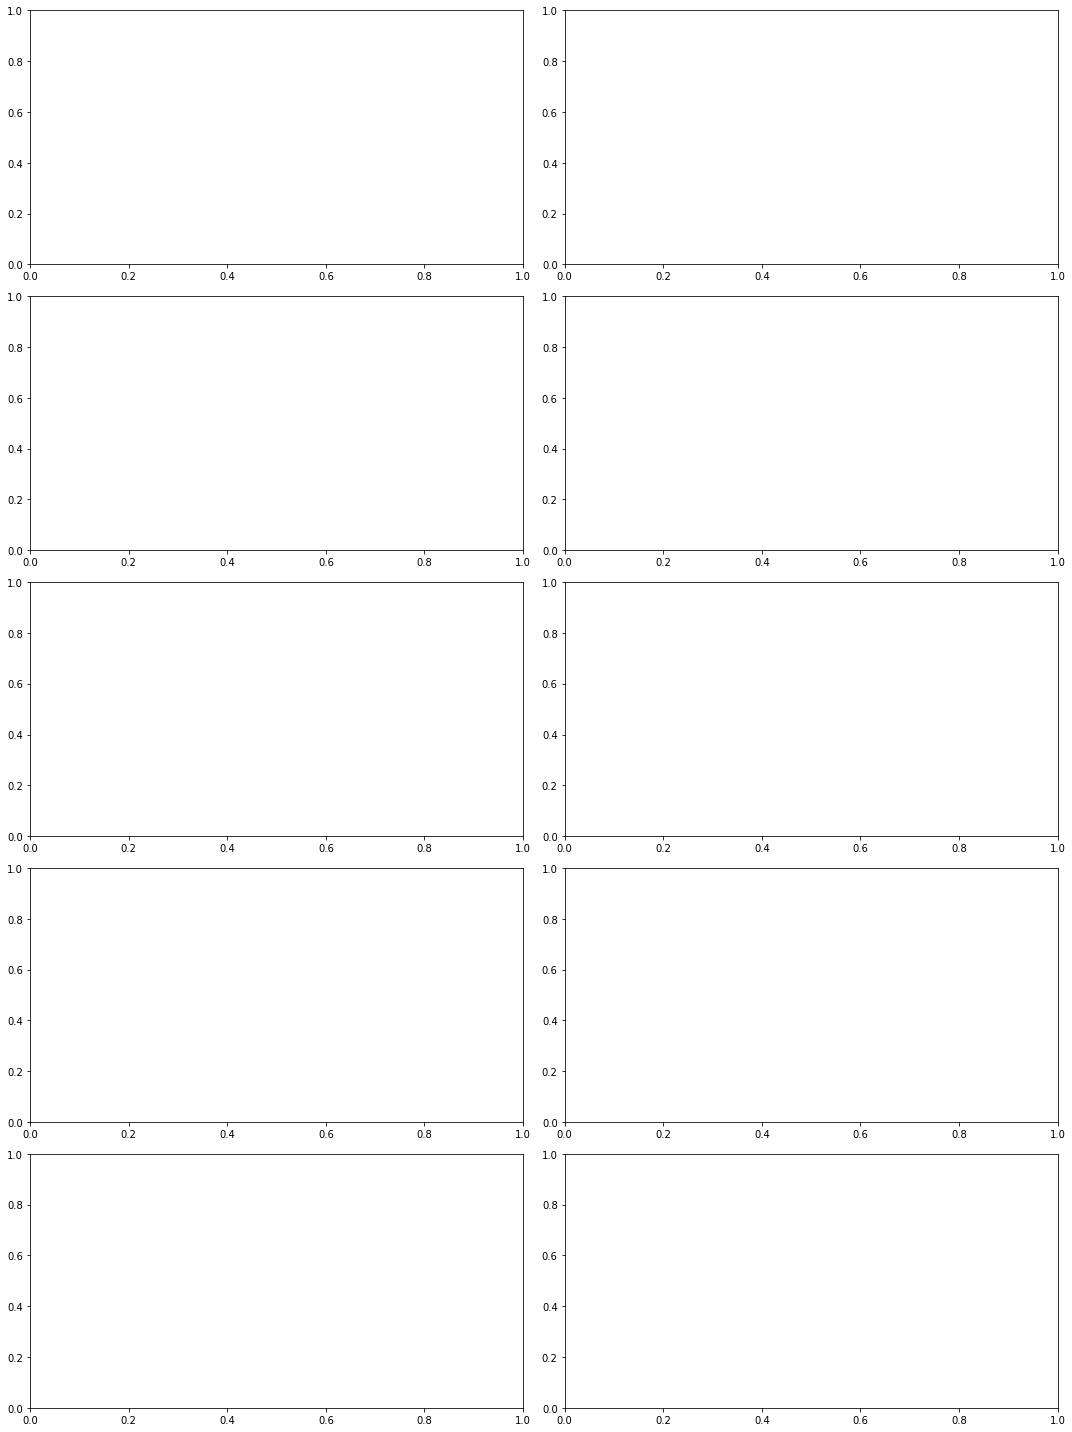

In [59]:
plt.subplots(5, 2, tight_layout=True,figsize=(15,20))

In [8]:
O_1,S,O_2 = XY_model.Compute_svd_Cov_Matrix(Data[0,:,0],Data[0,:,1],50)

In [7]:
XY_model.Plot_Modes(Data[0,:,0],Data[0,:,1],50)

TypeError: Compute_svd_Cov_Matrix() got multiple values for argument 'L'